In [47]:
import numpy as np
import pandas as pd
import os
import scipy.stats as sts
import matplotlib.pyplot as plt
direc_train = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Data/4_rcn/Raw Data/Trained/'
direc_notrain = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Data/4_rcn/Raw Data/Untrained/'

In [30]:
def count_errors(pieces_reconi,pieces_reconf):
    return np.array([sum([x[i]!=y[i] for i in range(36)])/len(x.split('1')) 
                     for x,y in zip(pieces_reconi,pieces_reconf)])

def count_errors_data(d):
    return np.mean(count_errors(d.loc[d.status=='reconi'].bp,d.loc[d.status=='reconf'].bp) +
                   count_errors(d.loc[d.status=='reconi'].wp,d.loc[d.status=='reconf'].wp))


In [31]:
fnames_train = [os.path.join(direc_train,f) for f in os.listdir(direc_train) if 
          f.startswith('reconstruction_') and f.endswith('.csv')]
col_names = ['','','','','','status','bp','wp','','','','','']
data_train = [pd.read_csv(f,header=None,names=col_names,delimiter=",") for f in fnames_train]
errors_train = [count_errors_data(d) for d in data_train]

In [32]:
fnames_notrain = [os.path.join(direc_notrain,f) for f in os.listdir(direc_notrain) if 
          f.startswith('memtask_') and f.endswith('.csv')]
col_names = ['','','','','','status','bp','wp','','','','','']
data_notrain = [pd.read_csv(f,header=None,names=col_names,delimiter=",") for f in fnames_notrain]
errors_notrain = [count_errors_data(d) for d in data_notrain]

In [33]:
[sts.ttest_ind(errors_train,errors_notrain),
 sts.mannwhitneyu(errors_train,errors_notrain),
 sts.ranksums(errors_train,errors_notrain)]

[Ttest_indResult(statistic=-1.0328867564398108, pvalue=0.30854617835342435),
 MannwhitneyuResult(statistic=133.0, pvalue=0.085007888398311582),
 RanksumsResult(statistic=-1.3867504905630728, pvalue=0.16551785869747015)]

In [43]:
boards_recon = pd.read_csv('C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Analysis/4_rcn/boards_for_reconstruction.txt',
           delimiter=',').values[:,:36].astype(int)

boards_recon_rand = pd.read_csv('C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Analysis/4_rcn/boards_for_reconstruction_random.txt',
           delimiter=',').values[:,:36].astype(int)

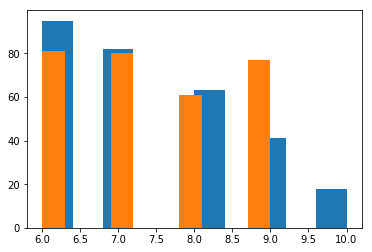

In [51]:
plt.hist(np.sum(boards_recon,axis=1))
plt.hist(np.sum(boards_recon_rand,axis=1))
plt.show()

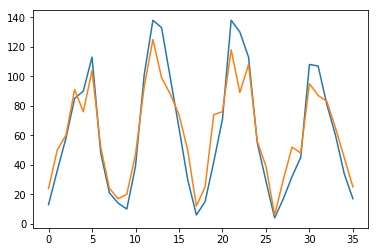

In [54]:
plt.plot(np.sum(boards_recon,axis=0))
plt.plot(np.sum(boards_recon_rand,axis=0))
plt.show()